In [1]:
import librosa
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sklearn
import pathlib
import csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import itertools
# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [2]:
DATASET_PATH = "./genres/genres"

# Sampling rate (Hz)
SAMPLE_RATE = 22050

# Frame size (Samples)
FRAME_SIZE = 2048

# Hop Size (Samples)
HOP_SIZE = 512

In [3]:
header = ['meanZCR', 'stdZCR', 'meanSpecCentroid', 'stdSpecCentroid', 'meanSpecContrast', 'stdSpecContrast',
                     'meanSpecBandwidth', 'stdSpecBandwidth', 'meanSpecRollof', 'stdSpecRollof',
                     'meanMFCC_1', 'stdMFCC_1', 'meanMFCC_2', 'stdMFCC_2', 'meanMFCC_3', 'stdMFCC_3',
                     'meanMFCC_4', 'stdMFCC_4', 'meanMFCC_5', 'stdMFCC_5', 'meanMFCC_6', 'stdMFCC_6',
                     'meanMFCC_7', 'stdMFCC_7', 'meanMFCC_8', 'stdMFCC_8', 'meanMFCC_9', 'stdMFCC_9',
                     'meanMFCC_10', 'stdMFCC_10', 'meanMFCC_11', 'stdMFCC_11', 'meanMFCC_12', 'stdMFCC_12',
                     'meanMFCC_13', 'stdMFCC_13','label'
                     ]


In [7]:
def extract_features(signal, sample_rate, frame_size, hop_size):
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y=signal, frame_length=frame_size, hop_length=hop_size)
    spectral_centroid = librosa.feature.spectral_centroid(y=signal, sr=sample_rate, n_fft=frame_size,
                                                          hop_length=hop_size)
    spectral_contrast = librosa.feature.spectral_contrast(y=signal, sr=sample_rate, n_fft=frame_size,
                                                          hop_length=hop_size)
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=signal, sr=sample_rate, n_fft=frame_size,
                                                            hop_length=hop_size)
    spectral_rolloff = librosa.feature.spectral_rolloff(y=signal, sr=sample_rate, n_fft=frame_size, hop_length=hop_size)
    mfccs = librosa.feature.mfcc(y=signal, sr=sample_rate, n_fft=frame_size, hop_length=hop_size)

    return [

        np.mean(zero_crossing_rate),
        np.std(zero_crossing_rate),
        np.mean(spectral_centroid),
        np.std(spectral_centroid),
        np.mean(spectral_contrast),
        np.std(spectral_contrast),
        np.mean(spectral_bandwidth),
        np.std(spectral_bandwidth),
        np.mean(spectral_rolloff),
        np.std(spectral_rolloff),

        np.mean(mfccs[1, :]),
        np.std(mfccs[1, :]),
        np.mean(mfccs[2, :]),
        np.std(mfccs[2, :]),
        np.mean(mfccs[3, :]),
        np.std(mfccs[3, :]),
        np.mean(mfccs[4, :]),
        np.std(mfccs[4, :]),
        np.mean(mfccs[5, :]),
        np.std(mfccs[5, :]),
        np.mean(mfccs[6, :]),
        np.std(mfccs[6, :]),
        np.mean(mfccs[7, :]),
        np.std(mfccs[7, :]),
        np.mean(mfccs[8, :]),
        np.std(mfccs[8, :]),
        np.mean(mfccs[9, :]),
        np.std(mfccs[9, :]),
        np.mean(mfccs[10, :]),
        np.std(mfccs[10, :]),
        np.mean(mfccs[11, :]),
        np.std(mfccs[11, :]),
        np.mean(mfccs[12, :]),
        np.std(mfccs[12, :]),
        np.mean(mfccs[13, :]),
        np.std(mfccs[13, :]),
    ]

In [9]:
dataset_path = DATASET_PATH
file = open('data2.csv', 'w', newline='')
with file:
    writer = csv.writer(file)
    writer.writerow(header)
for (dirpath, dirnames, filenames) in os.walk(dataset_path):
    # ensurer on parcours un dossier du genre
    if dirpath is not dataset_path:
            # enregistrer l'étiquette de genre (c'est-à-dire le nom du sous-dossier) dans le mapping
            semantic_label = dirpath.split("\\")[-1]
            #data["mapping"].append(semantic_label)
            print("\nProcessing: {}".format(semantic_label))

            # traiter tous les fichier dans genre sub-dir
            for f in filenames:

                # load audio file
                file_path = os.path.join(dirpath, f)
                signal, sample_rate = librosa.load(file_path, sr=SAMPLE_RATE)
                row = extract_features(signal, sample_rate, FRAME_SIZE ,HOP_SIZE)
                row.append(semantic_label)
                file = open('data2.csv', 'a', newline='')
                with file:
                    writer = csv.writer(file)
                    writer.writerow(row)
        


Processing: blues

Processing: classical

Processing: country

Processing: disco

Processing: hiphop

Processing: jazz

Processing: metal

Processing: pop

Processing: reggae

Processing: rock


In [33]:
data = pd.read_csv('data2.csv')
data.head()

,meanZCR,stdZCR,meanSpecCentroid,stdSpecCentroid,meanSpecContrast,stdSpecContrast,meanSpecBandwidth,stdSpecBandwidth,meanSpecRollof,stdSpecRollof,...,stdMFCC_9,meanMFCC_10,stdMFCC_10,meanMFCC_11,stdMFCC_11,meanMFCC_12,stdMFCC_12,meanMFCC_13,stdMFCC_13,label
0,0.083045,0.027694,1784.165850,360.241675,20.526699,8.760242,2002.449060,293.057608,3805.839606,949.476395,...,7.961552,-8.326573,7.859586,8.803792,7.158500,-3.672300,6.420079,5.747995,6.368240,blues
1,0.056040,0.038046,1530.176679,613.066125,20.676128,8.237203,2039.036516,462.432433,3550.522098,1725.657379,...,10.215605,-5.555639,10.255420,5.376327,9.808018,-2.231760,8.056941,4.220140,8.552925,blues
2,0.076291,0.031731,1552.811865,395.559911,22.197517,8.725292,1747.702312,276.141616,3042.260232,885.457204,...,8.240684,-13.133803,7.601409,5.791199,8.029957,-8.907628,7.770788,-1.077000,7.596785,blues
3,0.033309,0.020561,1070.106615,429.366909,21.426268,7.961446,1596.412872,407.972419,2184.745799,1221.963322,...,8.444766,-3.200653,10.499366,6.079319,6.946366,-2.480174,7.536538,-1.079305,7.892395,blues
4,0.101461,0.044205,1835.004266,586.003361,21.466338,7.936384,1748.172116,297.397392,3579.757627,1254.184130,...,9.983767,-13.088418,8.958464,-2.813867,9.296807,-6.933384,9.463374,-7.552725,8.422787,blues


In [11]:
data.shape

(1000, 28)

In [12]:
# Dropping unneccesary columns
data = data.drop(['filename'],axis=1)

In [13]:
genre_list = data.iloc[:, -1]
encoder = LabelEncoder()
y = encoder.fit_transform(genre_list)

X = data.iloc[:, :-1].to_numpy()
print(X)

[[ 3.50088120e-01  1.30227923e-01  1.78416585e+03 ... -4.08978969e-01
  -2.30352259e+00  1.22129011e+00]
 [ 3.40913594e-01  9.59478095e-02  1.53017668e+03 ...  2.95073062e-01
  -2.83518225e-01  5.31215847e-01]
 [ 3.63637209e-01  1.75570413e-01  1.55281186e+03 ... -1.81640685e+00
  -3.43972039e+00 -2.23125887e+00]
 ...
 [ 4.32142019e-01  8.16509798e-02  2.07752660e+03 ...  3.44097805e+00
  -1.25880699e+01 -2.10633683e+00]
 [ 3.62484574e-01  8.38599354e-02  1.39869934e+03 ...  1.55620730e+00
  -5.04189682e+00 -3.59064436e+00]
 [ 3.58401328e-01  5.44540286e-02  1.60979508e+03 ...  2.83459909e-02
  -2.02578235e+00  1.15523851e+00]]


In [14]:
sc = StandardScaler()
X = sc.fit_transform(X)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2 , random_state=0,stratify=y)

In [57]:
len(y_train)

800

In [58]:
len(y_test)

200

In [59]:
GENRES = ["blues",
        "classical",
        "country",
        "disco",
        "hiphop",
        "jazz",
        "metal",
        "pop",
        "reggae",
        "rock"]

In [60]:
def confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
   
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

def plot_cnf(model,dataset_x,dataset_y,GENRES):
    true_y=dataset_y
    true_x=dataset_x
    pred=model.predict(true_x)

    print("---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------\n")

    print("Real Test dataset labels: \n{}\n".format(true_y))
    print("Predicted Test dataset labels: \n{}".format(pred))

    cnf_matrix=sklearn.metrics.confusion_matrix(true_y,pred)
    cnf_matrix_norm = np.around(cnf_matrix.astype('float') / cnf_matrix.sum(axis=1)[:, np.newaxis], decimals=2)
    plt.figure()
    a=confusion_matrix(cnf_matrix_norm,classes=GENRES,title='Confusion matrix')

Max Accuracy is 0.670 on test dataset with 4 neighbors.

Training Score: 0.780
Test score: 0.670
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
[2 7 2 9 7 1 4 5 3 6 3 4 6 9 8 5 2 6 6 8 3 2 9 8 2 0 4 7 7 9 6 6 5 9 2 8 9
 9 9 0 1 8 3 4 6 0 9 6 7 0 0 2 1 0 0 4 6 0 7 1 1 2 2 0 5 7 5 4 1 8 5 7 1 3
 3 3 0 1 8 6 2 9 0 4 6 4 0 1 8 3 7 6 9 6 8 3 7 8 2 3 5 3 5 2 1 5 9 2 5 3 4
 1 2 9 9 5 8 1 9 3 4 4 7 7 3 9 7 8 6 7 2 8 5 5 1 2 1 7 2 4 4 7 0 4 0 7 9 3
 9 5 0 3 7 3 1 6 0 9 4 1 3 6 8 2 1 5 1 1 6 2 0 4 0 4 5 8 4 3 0 9 5 5 6 8 0
 4 3 7 1 8 6 8 5 6 7 8 2 8 4 5]

Predicted Test dataset labels: 
[2 7 2 9 7 1 4 8 3 6 3 3 6 2 8 5 2 3 4 8 3 2 9 3 2 6 2 3 7 9 9 6 7 9 2 0 9
 0 9 0 1 4 3 4 6 0 9 6 7 0 0 2 1 0 0 4 6 0 8 5 1 2 2 0 5 7 5 4 1 8 1 7 1 0
 3 3 2 1 8 0 4 9 0 4 6 2 0 1 8 6 8 3 9 6 4 9 7 4 1 3 5 9 5 2 1 1 5 2 5 3 3
 1 5 6 9 5 7 1 9 0 4 4 7 7 0 0 7 2 9 7 3 3 9 5 1 2 1 7 5 0 3 7 0 2 0 7 9 3
 9 1 0 3 9 3 1 6 2 9 0 1 2 6 8 2 1 1 1 1 6 2 0 4 0 3 5 8 3 2 2 2 5 5 

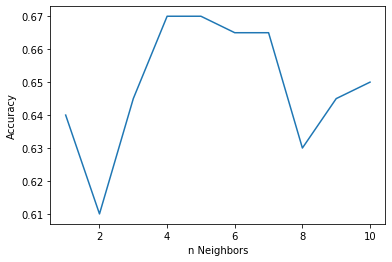

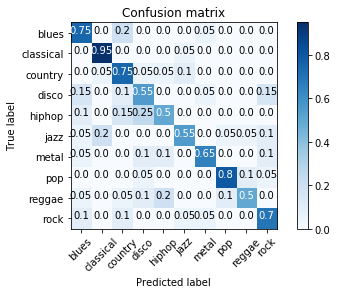

In [61]:

results_knn=[]
for i in range(1,11):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    results_knn.append(knn.score(X_test,y_test))
    
max_accuracy_knn=max(results_knn)
best_k=1+results_knn.index(max(results_knn))
print("Max Accuracy is {:.3f} on test dataset with {} neighbors.\n".format(max_accuracy_knn,best_k))

plt.plot(np.arange(1,11),results_knn)
plt.xlabel("n Neighbors")
plt.ylabel("Accuracy")


knn=KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train,y_train)
print("Training Score: {:.3f}".format(knn.score(X_train,y_train)))
print("Test score: {:.3f}".format(knn.score(X_test,y_test)))  

plot_cnf(knn,X_test,y_test,GENRES)

Training Score: 0.999
Test score: 0.700
---------------PERFORMANCE ANALYSIS FOR THE MODEL----------------

Real Test dataset labels: 
[2 7 2 9 7 1 4 5 3 6 3 4 6 9 8 5 2 6 6 8 3 2 9 8 2 0 4 7 7 9 6 6 5 9 2 8 9
 9 9 0 1 8 3 4 6 0 9 6 7 0 0 2 1 0 0 4 6 0 7 1 1 2 2 0 5 7 5 4 1 8 5 7 1 3
 3 3 0 1 8 6 2 9 0 4 6 4 0 1 8 3 7 6 9 6 8 3 7 8 2 3 5 3 5 2 1 5 9 2 5 3 4
 1 2 9 9 5 8 1 9 3 4 4 7 7 3 9 7 8 6 7 2 8 5 5 1 2 1 7 2 4 4 7 0 4 0 7 9 3
 9 5 0 3 7 3 1 6 0 9 4 1 3 6 8 2 1 5 1 1 6 2 0 4 0 4 5 8 4 3 0 9 5 5 6 8 0
 4 3 7 1 8 6 8 5 6 7 8 2 8 4 5]

Predicted Test dataset labels: 
[2 7 2 2 7 1 4 5 8 6 3 4 6 9 8 5 3 3 5 8 3 2 9 3 2 6 4 3 7 9 9 6 8 9 2 5 9
 0 9 0 1 8 3 3 6 0 3 6 7 0 0 2 1 0 0 4 6 0 3 1 1 2 2 0 1 7 5 4 1 8 1 7 1 3
 3 3 2 1 8 6 4 9 0 4 6 9 2 1 8 6 8 0 0 6 8 3 7 4 2 3 5 9 5 2 1 5 2 2 5 3 3
 1 5 9 3 5 4 5 9 3 2 4 7 7 9 0 7 2 2 8 2 3 5 1 1 2 1 7 0 4 3 7 0 2 3 7 5 3
 9 5 0 4 2 2 1 6 2 9 4 1 3 6 8 2 1 5 1 5 6 2 0 4 0 3 5 8 4 2 2 0 5 5 6 8 0
 4 3 7 1 8 4 7 9 6 7 8 2 4 4 0]


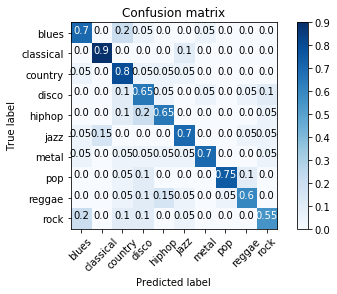

In [62]:
svm=SVC(C=100)
svm.fit(X_train,y_train)
print("Training Score: {:.3f}".format(svm.score(X_train,y_train)))
print("Test score: {:.3f}".format(svm.score(X_test,y_test)))
plot_cnf(svm,X_test,y_test,GENRES)